<a href="https://colab.research.google.com/github/Sonarajan04/DeepLearning_projects/blob/main/RNN_milk_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/monthly_milk_production.csv')
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [4]:
df.shape

(168, 2)

In [5]:
df.dtypes

Date          object
Production     int64
dtype: object

In [6]:
df.isna().sum()

Date          0
Production    0
dtype: int64

In [7]:
df=pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [8]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

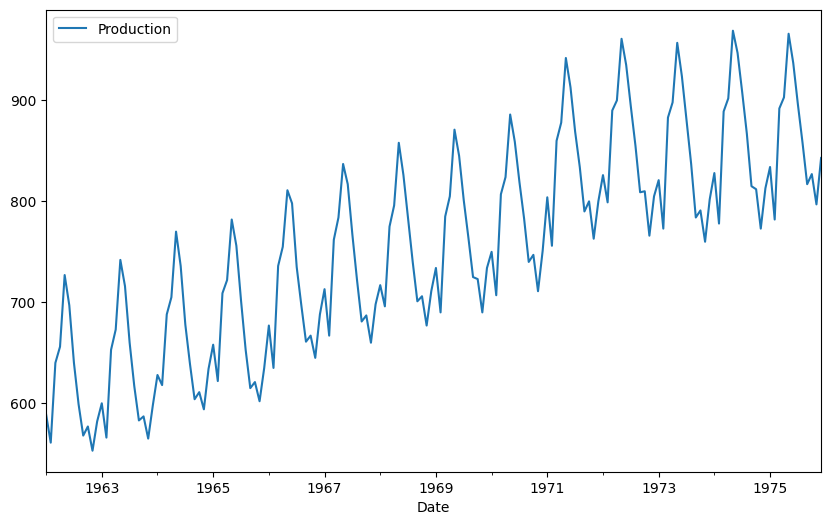

In [9]:
df.plot(figsize=(10,6))

In [10]:
#creating train and test sets

In [11]:
train=df.iloc[:156]  #total 168,last 12 for testing
test=df.iloc[156:]

In [12]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [14]:
scaled_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [15]:
scaled_train

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [16]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [17]:
X,y=generator[0] #first 3-->input,4thvalue=output
print(X)
print('*'*100)
print(y)

[[[0.08653846]
  [0.01923077]
  [0.20913462]]]
****************************************************************************************************
[[0.24759615]]


In [21]:
n_input=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [20]:
X,y=generator[0]
print(X)
print('*'*50)
print(y)

[[[0.08653846]
  [0.01923077]
  [0.20913462]
  [0.24759615]
  [0.41826923]
  [0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]]]
**************************************************
[[0.11298077]]


In [22]:
X.shape

(1, 12, 1)

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))

In [25]:
model.compile(optimizer='adam',loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(generator,epochs=50,batch_size=5)

Epoch 1/50
144/144 [==============================] - 3s 9ms/step - loss: 0.0470
Epoch 2/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0234
Epoch 3/50
144/144 [==============================] - 2s 13ms/step - loss: 0.0191
Epoch 4/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0142
Epoch 5/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0109
Epoch 6/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0068
Epoch 7/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0059
Epoch 8/50
144/144 [==============================] - 3s 17ms/step - loss: 0.0043
Epoch 9/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0046
Epoch 10/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 11/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0052
Epoch 12/50
144/144 [==============================] - 1s 10ms/step - loss: 0.0039
Epoch 13/50
144/1

In [28]:
last_train_batch=scaled_train[-12:]

In [29]:
last_train_batch.shape

(12, 1)

In [30]:
last_train_batch=last_train_batch.reshape(1,n_input,n_features)

In [31]:
last_train_batch.shape

(1, 12, 1)

In [32]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 231ms/step


array([[0.64052474]], dtype=float32)

In [33]:
scaled_test[0] #original value

array([0.67548077])

In [34]:
import numpy as np

In [35]:
test_prediction=[]
first_eval_batch=scaled_train[-12:]
current_batch=first_eval_batch.reshape(1,12,1)
for i in range(len(test)):  #12 numbr,or can use scaled_test
      #prediction
      current_pred=model.predict(current_batch)[0]
      test_prediction.append(current_pred)
      #update current batch
      current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [36]:
test_prediction

[array([0.64052474], dtype=float32),
 array([0.59228045], dtype=float32),
 array([0.78943145], dtype=float32),
 array([0.85320956], dtype=float32),
 array([0.9726584], dtype=float32),
 array([0.95140475], dtype=float32),
 array([0.87425953], dtype=float32),
 array([0.7738283], dtype=float32),
 array([0.65469843], dtype=float32),
 array([0.6192905], dtype=float32),
 array([0.5569926], dtype=float32),
 array([0.6115304], dtype=float32)]

In [37]:
test  #original val

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [38]:
predictions=scaler.inverse_transform(test_prediction) #predicted val
predictions

array([[819.45829391],
       [799.38866615],
       [881.40348434],
       [907.93517494],
       [957.62589264],
       [948.78437614],
       [916.6919651 ],
       [874.9125843 ],
       [825.3545475 ],
       [810.62483597],
       [784.70891762],
       [807.39665604]])

In [39]:
test['Predictions']=predictions
test

<ipython-input-39-0db927256bce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=predictions


,Production,Predictions
Date,,
1975-01-01,834,819.458294
1975-02-01,782,799.388666
1975-03-01,892,881.403484
1975-04-01,903,907.935175
1975-05-01,966,957.625893
1975-06-01,937,948.784376
1975-07-01,896,916.691965
1975-08-01,858,874.912584
1975-09-01,817,825.354548


<Axes: xlabel='Date'>

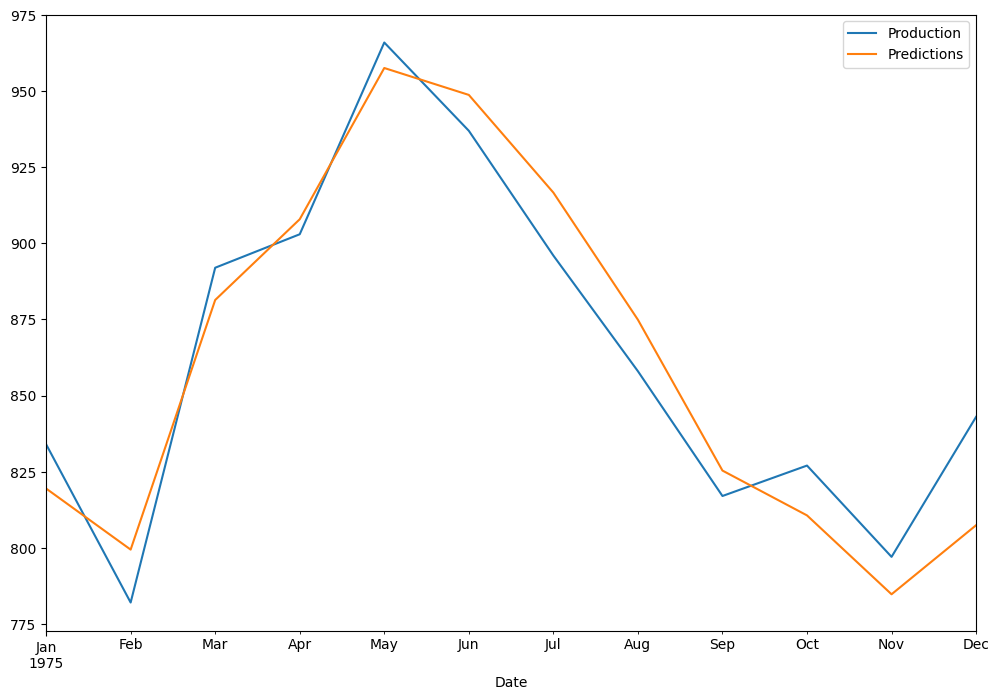

In [40]:
test.plot(figsize=(12,8))

In [41]:
#error

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
print(mean_squared_error(test['Production'],test['Predictions']))

277.5227011355653


In [44]:
from sklearn.metrics import r2_score
print(r2_score(test['Production'],test['Predictions']))

0.9054132766470343
